In [1]:
# Author: Anderson Carlos da Silva Morais | https://github.com/AndersonCSM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""
EDO - PVI decaimento radioativo

dq/dt = k * q(t)
k = -0,04332

t_0 = 0
q_0 = 30

"""


'\nEDO - PVI decaimento radioativo\n\ndq/dt = k * q(t)\nk = -0,04332\n\nt_0 = 0\nq_0 = 30\n\n'

In [2]:
def euler_method(ed, y0, t0, n, h):
    """
    Implementação do método de Euler para resolver EDOs de primeira ordem.

    Parâmetros:
    - ed: Função que define a EDO (dy/dx = f(x, y))
    - y0: Condição inicial para y
    - t0: Condição inicial para t
    - n: Quantidades de partições
    - h: Tamanho do passo

    Retorna:
    - x: Lista dos valores de t calculados
    - y: Lista dos valores de y calculados
    """

    t = [t0]  # adiciona o ponto inicial a lista
    y = [y0]  # adiciona o ponto inicial a lista

    for i in range(1, n+1):  # percorre a lista
        t_m = t0 + i * h
        y_m = y[i-1] + h * ed(y[i - 1], t[i - 1])

        y.append(y_m)  # adiciona os valores a lista
        t.append(t_m)  # adiciona os valores a lista

    return t, y


In [3]:
# Parâmetros iniciais
y0 = 30
t0 = 0
h = 0.5
n = int((60 - 0)/h)

In [4]:
# exata
def exata(t):
    return 30 * np.exp(-0.04332 * t)

# edo
def edo(y, t):
    return -0.04332 * y  #y = q(t)

In [5]:
# lista de pontos
x_p, y_p = euler_method(edo, y0, t0, n, h)

t_points = [t0 + i*h for i in range(n+1)]
y_exato = [exata(t) for t in t_points]

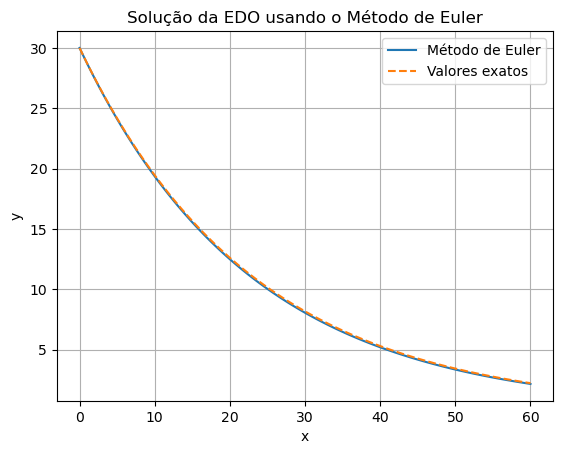

In [6]:
# Gráfico
plt.plot(x_p, y_p, label='Método de Euler')
plt.plot(x_p, y_exato, "--", label='Valores exatos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução da EDO usando o Método de Euler')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Dados
dados = {"tempo":t_points,
        "y_pontos":y_p,
        "y_exato":y_exato}
dt = pd.DataFrame(dados)

In [8]:
aux = dt[dt.tempo % 2 == 0]
aux

,tempo,y_pontos,y_exato
0,0.0,30.000000,30.000000
4,2.0,27.484035,27.510215
8,4.0,25.179073,25.227064
12,6.0,23.067418,23.133398
16,8.0,21.132857,21.213492
20,10.0,19.360540,19.452924
24,12.0,17.736858,17.838470
28,14.0,16.249348,16.358005
32,16.0,14.886588,15.000408
36,18.0,13.638117,13.755481
